In [10]:
from PIL import Image
import numpy as np
import pims
import matplotlib.pylab as plt


In [5]:
movie = 'Drosophila_larvae_vinaigre_011'
fname = f'/gpfs/soma_fs/nif/nif9201.bak/Euphrasie/Tracking experiment/Drosophila tracks/Successful/{movie}/'
frames_red = pims.open(fname + '*main.tiff')
frames_green = pims.open(fname + '*minor.tiff')

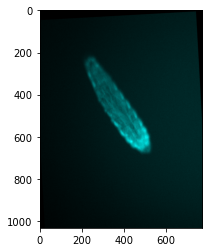

In [105]:
t = 460
image_green = frames_green[t]
image_red = frames_red[t]


# Stack the grayscale images to form a false-colored RGB image
false_colored_array = np.stack([image_red,image_green,image_green], axis=-1)
cyan = np.stack([np.zeros(image_red.shape),image_green,image_green], axis=-1).astype('uint8')
red = np.stack([image_red,np.zeros(image_red.shape),np.zeros(image_red.shape)], axis=-1).astype('uint8')
# Display the false-colored image
plt.imshow(false_colored_array)
plt.imshow(cyan)

(100.0, 800.0)
(100.0, 800.0)
(100.0, 800.0)


/gpfs/soma_fs/home/scholz/usr/miniconda3/envs/pumping/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later


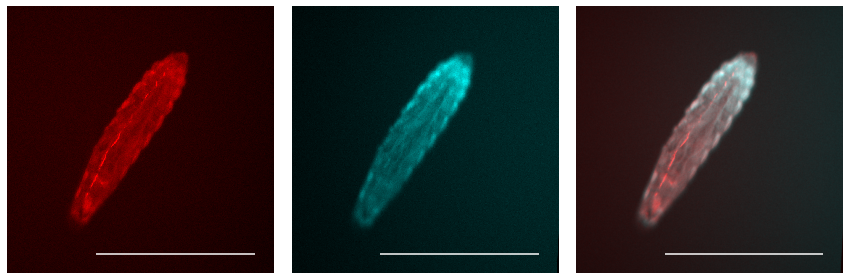

In [114]:
f, ax = plt.subplots(1,3, figsize=(12, 4))

ax[0].imshow(red, interpolation='None')
ax[0].axis('off')

ax[1].imshow(cyan, interpolation='None')
ax[1].axis('off')

ax[2].imshow(false_colored_array, cmap='gray')

ax[2].axis('off')
plt.subplots_adjust(hspace=0.1, wspace=0.1, top=1, bottom=0, left=0, right=1)
plt.setp(ax, xlim=(50,750), ylim = (100, 800))
# add a scalebar
scale = 2.4/1000 #(mm/px)
scalebar = 1 # mm
l = scalebar/scale
for i in range(3):
    xmax = ax[i].get_xlim()[1]
    print(ax[i].get_ylim())
    ax[i].hlines(ax[i].get_ylim()[0]+50, xmax-l-50, xmax-50, color = 'w', zorder=10)
plt.tight_layout()
plt.savefig(f'Larvae_example_{movie}_{t}.pdf', bbox='tight')
plt.show()
